In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as s
import kaggle as kg
import os


These libraries help you load, clean, analyze, visualize, and download data for your data science or machine learning projects.

In [2]:
os.environ["USERNAME"] = "bhoomijain012"
os.environ["KEY"] = "99ea904170a6d1d931d7dac01d2ffcb7"

Kaggle login info

In [4]:
kg.api.authenticate()

Api authentication

In [5]:

kg.api.dataset_download_files(dataset="yasserh/titanic-dataset", path="dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


Downloading dataset, giving its path to a folder names dataset and unziping it so it can be available as a csv file

In [7]:
data = pd.read_csv("dataset/Titanic-Dataset.csv")

Reading or loading dataset in a "data" dataframe

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reading first 5 rows of the dataset from "data"

In [12]:
data.shape #Shape of the dataset

(891, 12)

In [ ]:
data.info()   # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
data.describe()  #Descriptive stats for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.columns #Columns in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
data.isnull().sum()  #Missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

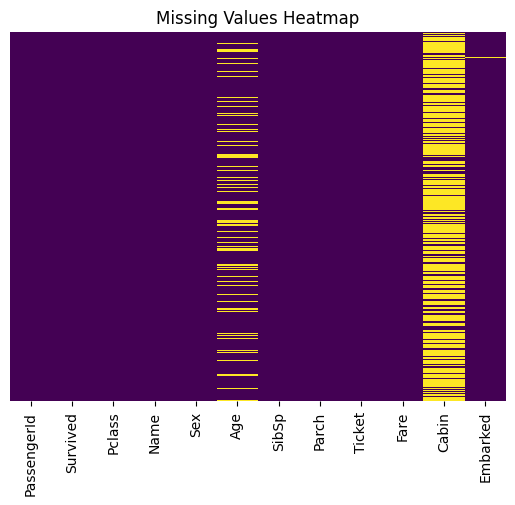

In [22]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Visualize missing (null) values in your dataset using a heatmap.

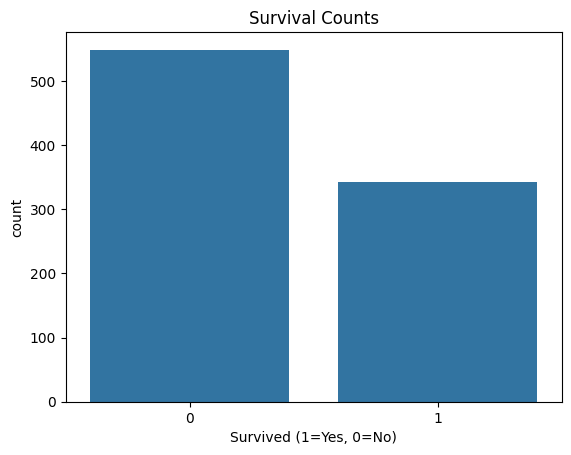

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [25]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Counts")
plt.xlabel("Survived (1=Yes, 0=No)")
plt.show()

# Percentage
data['Survived'].value_counts(normalize=True)

This shows how many passengers survived vs. not using a bar chart.
It also prints the percentage of survivors and non-survivors in the dataset.

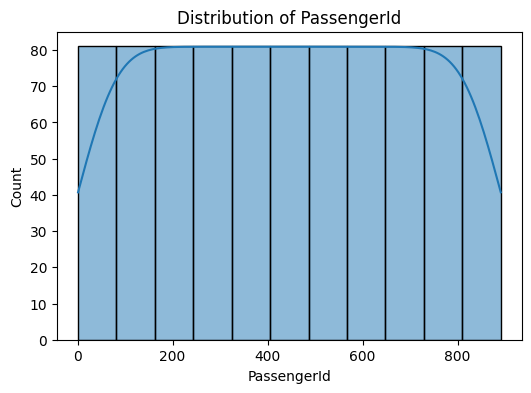

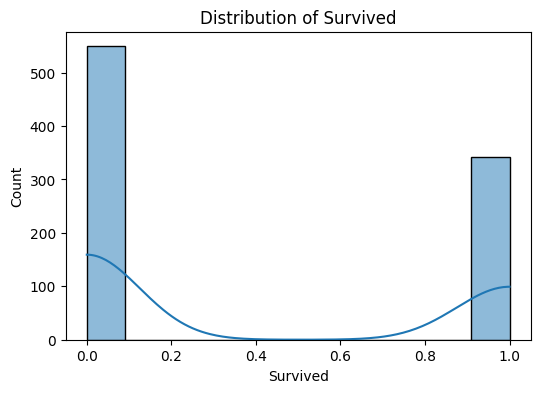

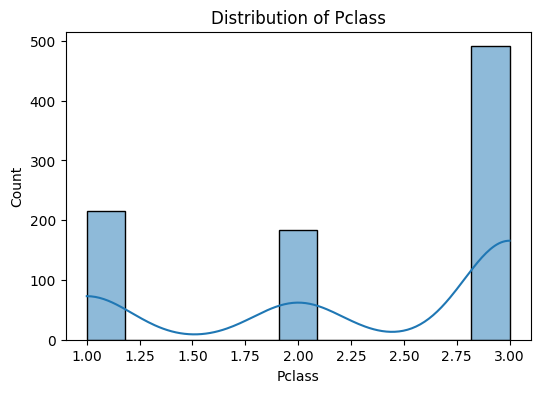

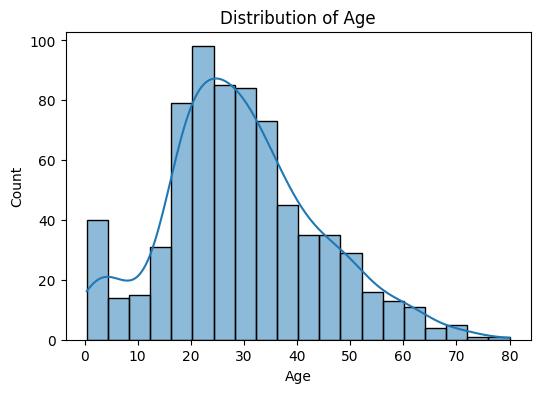

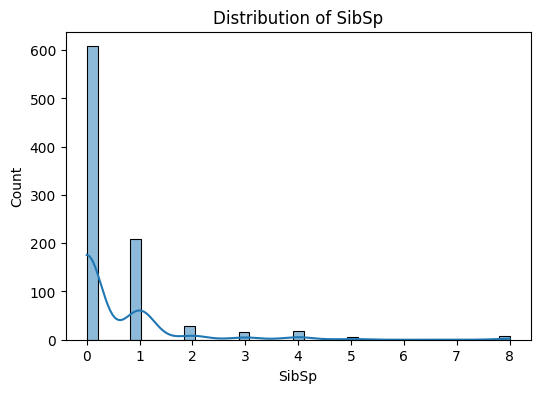

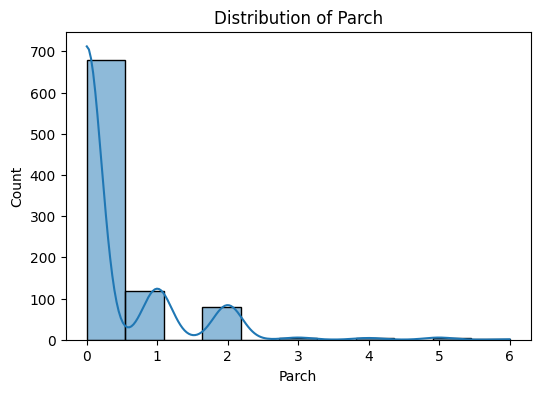

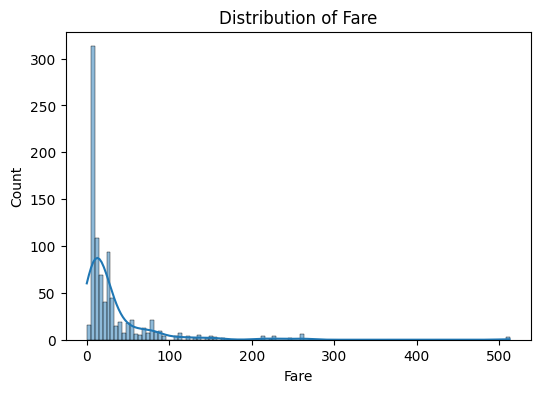

In [26]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The code above shows how the values are spread out in all the numeric columns (like Age, Fare, etc.) using histograms and smooth curves (KDE).

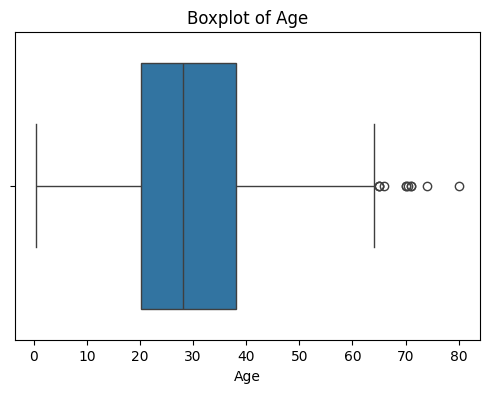

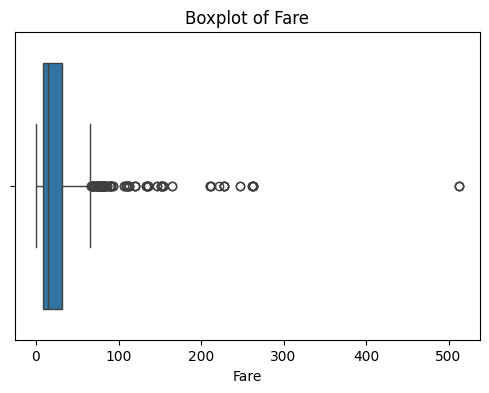

In [30]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

This code above draws boxplots for the columns Age and Fare to help identify outliers and understand data spread.

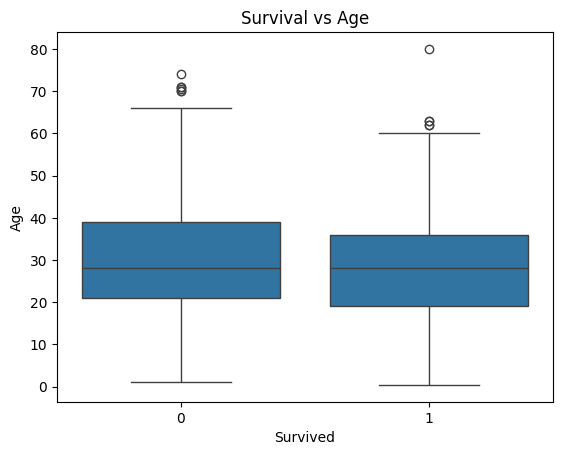

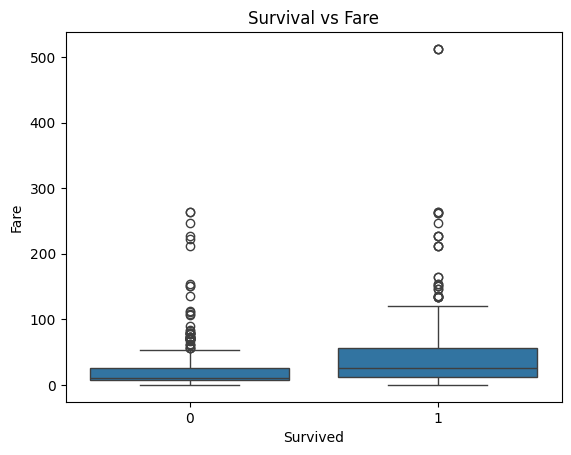

In [32]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Survival vs Age")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Survival vs Fare")
plt.show()

This code draws boxplots to compare the distribution of Age and Fare between passengers who survived (1) and those who did not survive (0).

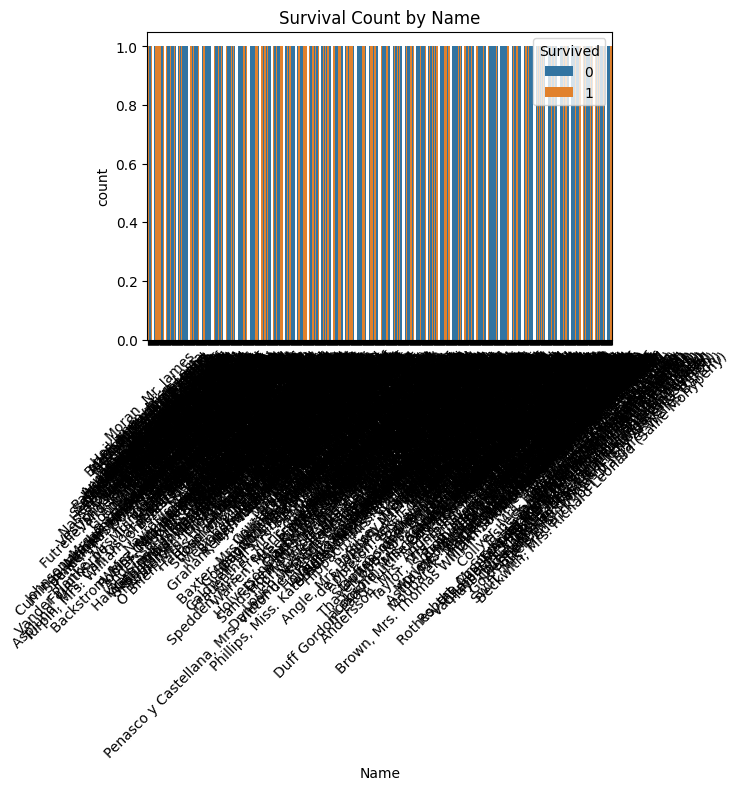

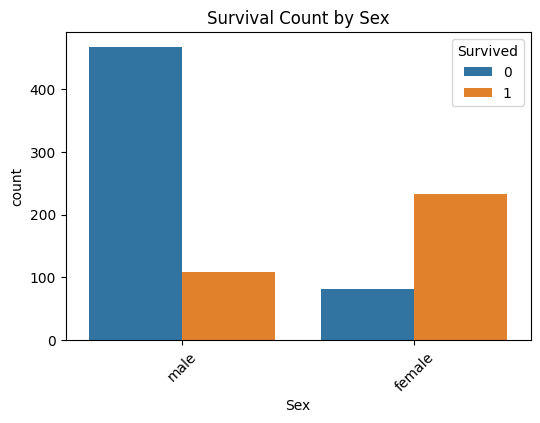

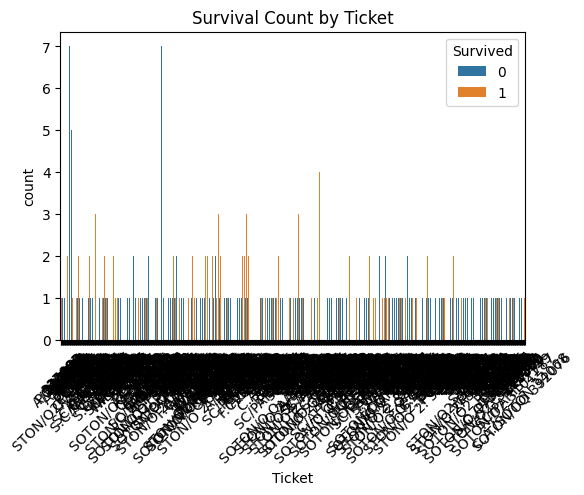

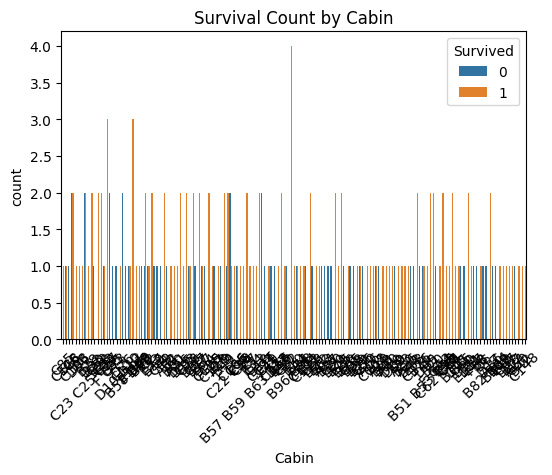

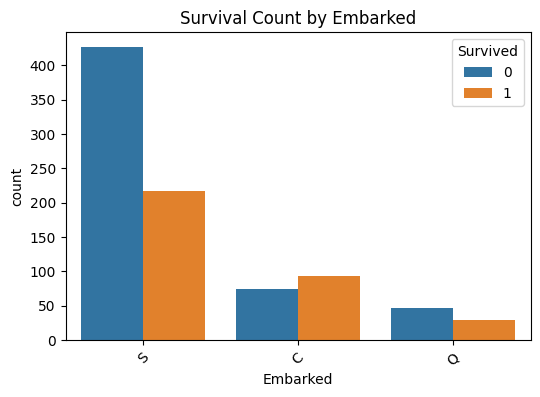

In [33]:
cat_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Survived', data=data)
    plt.title(f'Survival Count by {col}')
    plt.xticks(rotation=45)
    plt.show()


This code creates count plots to show how survival rates vary across different categorical columns (like Sex, Embarked, etc.).

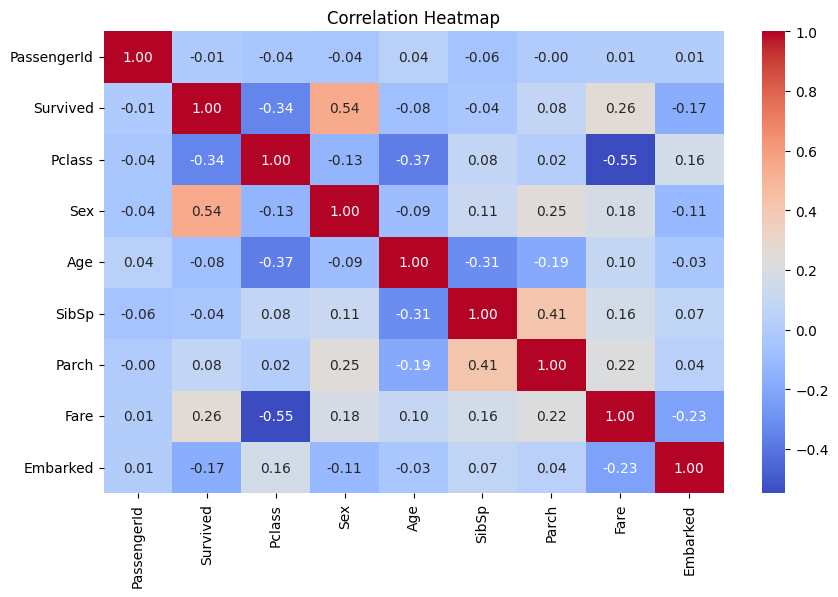

In [36]:
# Convert categorical to numeric for correlation
data_corr = data.copy()
data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})
data_corr['Embarked'] = data_corr['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

data_corr = data_corr.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This code shows a correlation heatmap between numeric features in the dataset.

In [58]:
from scipy.stats import zscore

numeric_data = data[['Age', 'Fare']].dropna()
z_scores = np.abs(zscore(numeric_data))
outliers = (z_scores > 3).any(axis=1)
print(f"Outliers found: {outliers.sum()} / {len(numeric_data)}")

Outliers found: 20 / 714


This code uses the Z-score method to detect outliers in the Age and Fare columns

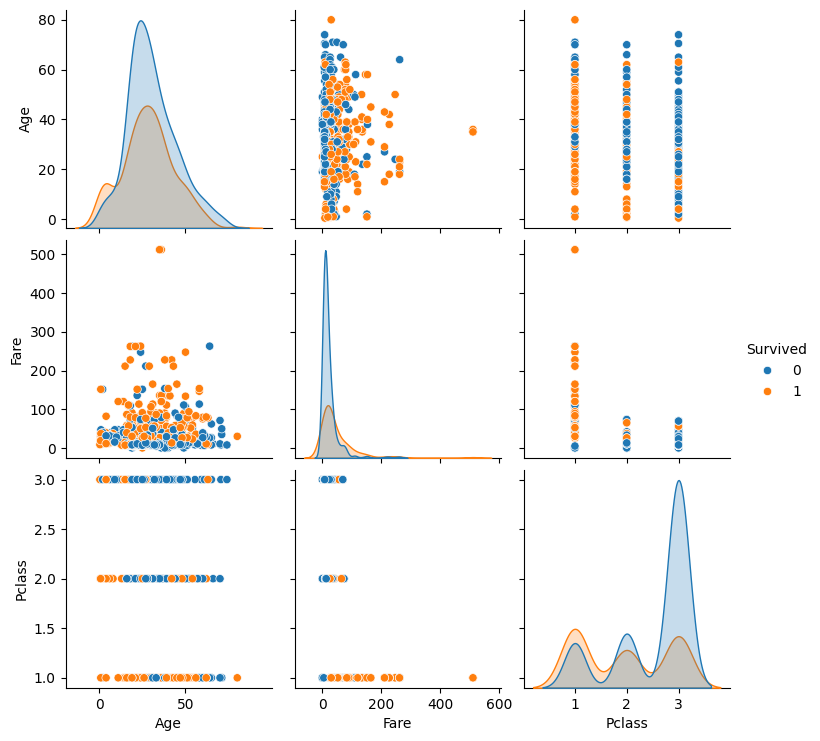

In [61]:
sns.pairplot(data, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.show()

This code creates a pairplot to visualize the relationships between Age, Fare, and Pclass, while highlighting Survival status.